### Plot the tSNE for Hyperparameter tuning

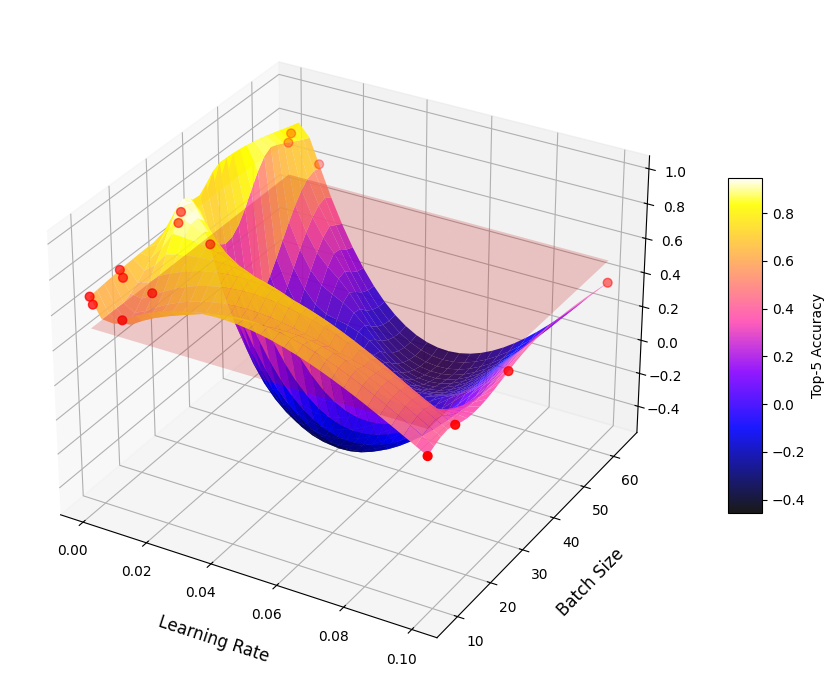

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Experimental points
lr = np.array([0.0001, 0.0001, 0.0001, 0.0001,
               0.001,  0.001,  0.001,  0.001,
               0.01,   0.01,   0.01,   0.01,
               0.1,    0.1,    0.1,    0.1])

bs = np.array([8, 16, 32, 64] * 4)

acc = np.array([
    0.68, 0.70, 0.7119, 0.69,
    0.64, 0.66, 0.78,   0.75,
    0.60, 0.62, 0.64,   0.61,
    0.35, 0.38, 0.40,   0.37
])

# Create grid
lr_grid = np.linspace(lr.min(), lr.max(), 30)
bs_grid = np.linspace(bs.min(), bs.max(), 30)
LR, BS = np.meshgrid(lr_grid, bs_grid)

# Interpolate surface
ACC = griddata(
    points=(lr, bs),
    values=acc,
    xi=(LR, BS),
    method='cubic'
)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    LR, BS, ACC,
    cmap='gnuplot2',
    edgecolor='none',
    alpha=0.9
)

# Scatter actual points
ax.scatter(lr, bs, acc, color='red', s=40)

# Baseline plane
baseline = 0.5
ax.plot_surface(
    LR, BS,
    np.full_like(LR, baseline),
    color='red',
    alpha=0.20
)

# # Best point annotation
# best_idx = np.argmax(acc)
# ax.scatter(
#     lr[best_idx], bs[best_idx], acc[best_idx],
#     color='red', s=120
# )

# ax.text(
#     lr[best_idx], bs[best_idx], acc[best_idx] + 0.02,
#     f"X = {lr[best_idx]:.4f}\nY = {bs[best_idx]}\nZ = {acc[best_idx]:.4f}",
#     bbox=dict(boxstyle="round", fc="white", ec="purple", lw=2)
# )

# Labels
ax.set_xlabel("Learning Rate", labelpad=12, fontsize=12)
ax.set_ylabel("Batch Size", labelpad=12, fontsize=12)
# ax.set_zlabel("Top-1 Accuracy", labelpad=12, fontsize=12)

fig.colorbar(surf, shrink=0.5, aspect=10, label="Top-5 Accuracy")

plt.tight_layout()
plt.show()
